In [1]:
import polars as pl
import numpy as np
import os
import json
os.chdir(os.path.expanduser('~/vEcoli/notebooks/mia_notebooks/metal_count_data/'))
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Set the default style
sns.set(style="darkgrid")

## template

Media type:  media

Bacterial species:

Units used in calculations:

QUESTIONS/ISSUES:

# Minimal Media Conditions Data

## Ground truth data from Outten & O'Halloran, Science, 2001 (https://pubmed.ncbi.nlm.nih.gov/11397910/)

Media type: a custom A minimal media

Bacterial species: I believe E. coli BW25113

Units used in calculations: Atoms/cell

QUESTIONS/ISSUES:
- need to confirm what type of minimal media conditions are used!

In [2]:
# load in the minimal media data from Outten & O'Halloran, 2001: https://pubmed.ncbi.nlm.nih.gov/11397910/
GT_data = pd.read_csv("cofactor_ground_truth_data_from_cyrus_for_mia.csv")
GT_mm_data = GT_data[:9]
GT_mm_df = pl.DataFrame(GT_mm_data[["Element","Atoms/cell"]])
GT_mm_df = GT_mm_df.with_columns(pl.col("Atoms/cell").log10().alias("$\t{E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001 (Ground Truth Data))"))
GT_mm_df = pl.DataFrame(GT_mm_df[["Element", "$\t{E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001 (Ground Truth Data))"]])

# replace the element names with the column names:
col_names = ["Mo", "Zn", "Cu", "Ni", "Co", "Fe", "Mn", "Cr", "V"]
GT_mm_df = GT_mm_df.with_columns(pl.col("Element").replace(pl.col("Element"), col_names).alias("Element"))
GT_mm_df

Element,"$ {E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001 (Ground Truth Data))"
str,f64
"""Mo""",3.600246
"""Zn""",5.300613
"""Cu""",3.894907
"""Ni""",3.577501
"""Co""",2.716067
"""Fe""",5.25522
"""Mn""",3.520492
"""Cr""",3.192079
"""V""",2.96536


## Minimal media data from Huynh et al., 2022 fig 1c and 1d (https://journals.asm.org/doi/full/10.1128/spectrum.01006-21): 

Media type: a-minimal media

Bacterial species: E. coli K-12 BW25113

Units used in calculations: Atoms/CFU

QUESTIONS/ISSUES: 

In [3]:
# load in minimal media data from Huynh et al., 2022 fig 1c and d (https://journals.asm.org/doi/full/10.1128/spectrum.01006-21): 
H_mm_2022 = pd.read_excel("Huynh_2022_F1CD_data.xlsx")

# convert data frames to polars data frames and rename the columns to be more descriptive: 
H_mm_2022 = pl.DataFrame(H_mm_2022[["Element","log10 AM (atoms/CFU)"]])
H_mm_2022 = H_mm_2022.with_columns(pl.col("log10 AM (atoms/CFU)").alias("$\t{E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)"))
H_mm_2022 = pl.DataFrame(H_mm_2022[["Element", "$\t{E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)"]])
H_mm_2022

Element,"$ {E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)"
str,f64
"""Mn""",2.913947
"""Fe""",5.780415
"""Cu""",3.661721
"""Zn""",4.142433
"""V""",2.449304
"""Cr""",3.903579
"""Co""",1.586481
"""Ni""",2.922465


## Minimal media data from Budhraja, et al., 2019 Fig 1 (https://academic.oup.com/metallomics/article/11/5/925/5962190#supplementary-data):

Media type: minimal media

Bacterial species: need strain info still

Units used in calculations: metal ions per cell

QUESTIONS/ISSUES:
- media makeup is quite custom, how should I name it in the graph? 

In [4]:
# load in the minimal media data from Budhraja et al., 2019: https://academic.oup.com/metallomics/article/11/5/925/5962190#supplementary-data
B_mm_2019 = pd.read_excel("Budhraja_2019_F1all_2019.xlsx")
B_mm_air_2019 = pl.DataFrame(B_mm_2019[["Element","log10 MM air (metal ions per cell)"]])
B_mm_air_2019 = B_mm_air_2019.with_columns(pl.col("log10 MM air (metal ions per cell)").alias("$\t{E. coli}$ strain? in custom aerobic minimal media (Budhraja et al., 2019)"))

B_mm_xair_2019 = pl.DataFrame(B_mm_2019[["Element","log10 MM xair (metal ions per cell) "]])
B_mm_xair_2019 = B_mm_xair_2019.with_columns(pl.col("log10 MM xair (metal ions per cell) ").alias("$\t{E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"))
B_mm_xair_2019

Element,log10 MM xair (metal ions per cell),"$ {E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"
str,f64,f64
"""Fe""",6.875181,6.875181
"""Co""",5.354136,5.354136
"""Ni""",4.111756,4.111756
"""Mo""",4.680697,4.680697


## M9 media from Umemura et al., 2017, table 11.2 (https://link.springer.com/chapter/10.1007/978-4-431-56463-8_11):

Media type: M9 media

Bacterial species: E. coli K-12 MG1655

Units used in calculations: atoms/cell

QUESTIONS/ISSUES:

In [5]:
# M9 data from Umemura et al., 2017, table 11.2 (https://link.springer.com/chapter/10.1007/978-4-431-56463-8_11): 
U_mm_2017 = pd.read_excel("Umemura_2017_T112_data.xlsx")

# transform into a polars data frame and rename the columns:
U_mm_2017 = pl.DataFrame(U_mm_2017[["Symbol","E. coli\xa0MG1655 in M9"]])
U_mm_2017 = U_mm_2017.with_columns(pl.col("E. coli\xa0MG1655 in M9").log10().alias("$\t{E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)"))
U_mm_2017 = U_mm_2017.rename({"Symbol": "Element"})
U_mm_2017

Element,E. coli MG1655 in M9,"$ {E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)"
str,f64,f64
"""Mg""",1.1e8,8.041393
"""P""",5.6e8,8.748188
"""S""",1.5e8,8.176091
"""K""",4.2e8,8.623249
"""Ca""",3.8e6,6.579784
…,…,…
"""Au""",null,null
"""Tl""",null,null
"""Pb""",120.0,2.079181


## MOPS data from Xu, et al., 2017, figure 1a: https://www.sciencedirect.com/science/article/pii/S002192582030538X?via%3Dihub#sec1

Media type: MOPS media

Bacterial species: E. coli MG1655

Units used in calculations: Intracellular metal content (per cell) in No Zn(II) supplement (assuming this means atoms/cell)

QUESTIONS/ISSUES: 
- comfirm that the units are equivalent to atoms/cell

In [6]:
# load in the data from Xu et al., 2017, figure 1a: https://www.sciencedirect.com/science/article/pii/S002192582030538X?via%3Dihub#sec1
Xu_F1A_2019 = pd.read_excel("Xu_2019_F1A_data.xlsx")
X_mm_2019 = pl.DataFrame(Xu_F1A_2019[["Element","Intracellular metal content (per cell) in No Zn(II) supplement"]])
X_mm_2019 = X_mm_2019.with_columns(pl.col("Intracellular metal content (per cell) in No Zn(II) supplement").log10().alias("$\t{E. coli}$ MG1655 in MOPS (Xu et al., 2019)"))
X_mm_2019

Element,Intracellular metal content (per cell) in No Zn(II) supplement,"$ {E. coli}$ MG1655 in MOPS (Xu et al., 2019)"
str,i64,f64
"""Zn""",140000,5.146128
"""Fe""",380000,5.579784
"""Mn""",32000,4.50515
"""Ni""",3000,3.477121
"""Cu""",20000,4.30103


## M9 Media data from Osman, et al., 2019: https://www.nature.com/articles/s41589-018-0211-4#Sec24

Media type: M9 minimal medium, supplemented with thiamine (10 μg ml−1) and L-histidine (20 μg ml−1)

Bacterial species: Salmonella enterica serovar Typhimurium strain SL1344 

Units used in calculations: atoms/cell

QUESTIONS/ISSUES:
- not sure how I should mention the other additivies in the media 

In [7]:
# load in the data from Osman et al., 2019: https://www.nature.com/articles/s41589-018-0211-4#Sec24
Osman_mm_2019 = pd.read_excel("Osman_2019_ST3_data.xlsx")
Osman_mm_2019 = pl.DataFrame(Osman_mm_2019[["Element","Total Metal (atoms/cell), Control"]])
O_mm_2019 = Osman_mm_2019.with_columns(pl.col("Total Metal (atoms/cell), Control").log10().alias("$\t{Salmonella}$ in M9 (Osman et al., 2019)"))
O_mm_2019

Element,"Total Metal (atoms/cell), Control","$ {Salmonella}$ in M9 (Osman et al., 2019)"
str,i64,f64
"""Mg""",26000000,7.414973
"""Mn""",160000,5.20412
"""Fe""",200000,5.30103
"""Co""",900,2.954243
"""Zn""",190000,5.278754
"""Ni""",4600,3.662758
"""Cu""",5100,3.70757


## MOPS Media data from LaVoie, et al., 2015: https://link.springer.com/article/10.1007/s00775-015-1303-1/figures/4

Media type: MOPS minimal medium supplemented with 20 mg/L uracil and 5 mg/L thiamine

Bacterial species: E. coli MG1655

Units used in calculations: atoms/cell

QUESTIONS/ISSUES:
- it would appear that there may be LB media used in the beginning of the incubation? Not exactly sure how that would affect the data.
- it also seems like the MOPS has some addititves to it, would this affect what I call it?

In [8]:
# load in the data from LaVoie et al., 2015: https://link.springer.com/article/10.1007/s00775-015-1303-1/figures/4
LaVoie_F4_2015 = pd.read_excel("LaVoie_2015_F4_data.xlsx")
L_mm_2015 = pl.DataFrame(LaVoie_F4_2015[["Element","unexposed"]])
L_mm_2015 = L_mm_2015.rename({"unexposed": "$\t{E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"})
L_mm_2015

Element,"$ {E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"
str,f64
"""Mg""",7.339623
"""Mn""",4.450135
"""Fe""",5.894879
"""Co""",3.975741
"""Ni""",3.609164
"""Cu""",4.277628
"""Zn""",4.838275


## Beauchene, 2014: https://asset.library.wisc.edu/1711.dl/LE7AB2DFQKDIP8O/R/file-1aa76.pdf

Media type: MOPS minimal glucose media with 10 µM FeSO4, Aerobic conditions and Anaerobic conditions

Bacterial species: E. coli K12 MG1655, but potentially also PK9427, PK10474, and PK10475? seems like MG1655 had PK9427 added into it?

Original Units: µg/mL cell lysate

QUESTIONS/ISSUES:
- unit conversion needs to be double checked 
- not sure about how to classify the media type? should I just throw it in my "hybrid" bin? it says MOPS but has some additives  
- need to figure out what the exact strain is in the table (if it has any of those others in it)
- is it wet or dry mass that I should be using for the conversion? I am pretty sure dry, but not totally sure

In [9]:
# load in the data from Beauchene, 2014: https://asset.library.wisc.edu/1711.dl/LE7AB2DFQKDIP8O/R/file-1aa76.pdf
Beauchene_T22_2014 = pd.read_excel("Beauchene_2014_T2_2_data.xlsx")
B_mm_air_2014 = pl.DataFrame(Beauchene_T22_2014[["Element","Aerobic Growth (µg/mL cell lysate)"]])
B_mm_xair_2014 = pl.DataFrame(Beauchene_T22_2014[["Element","Anaerobic Growth (µg/mL cell lysate)"]])

# filter out the elements that are not in the ground truth data:
overlap_element_names = ["Fe", "Mn", "Zn", "Cu", "Co", "Ni", "Mo", "V", "Cr"]
B_mm_air_2014 = B_mm_air_2014.select(["Element", "Aerobic Growth (µg/mL cell lysate)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2014 = B_mm_xair_2014.select(["Element", "Anaerobic Growth (µg/mL cell lysate)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2014

Element,Aerobic Growth (µg/mL cell lysate)
str,f64
"""Mn""",1.066
"""Co""",0.07
"""Ni""",0.012
"""Zn""",2.143
"""Fe""",6.306
"""Cu""",0.163


In [10]:
# convert from µg/mL cell lysate to g/mL:
B_mm_air_2014 = B_mm_air_2014.with_columns((pl.col("Aerobic Growth (µg/mL cell lysate)") * 10**(-6)).alias("Aerobic Growth (g/mL cell lysate)")) # 1*10^-6 g/mL = 1 µg/mL
B_mm_air_2014 = B_mm_air_2014.with_columns((pl.col("Aerobic Growth (g/mL cell lysate)") / (3.3*10**(-5)) ).alias("Aerobic Growth (g-element/g-cell-pellet)")) # 0.033 mg = 3.3*10^-5 g

B_mm_xair_2014 = B_mm_xair_2014.with_columns((pl.col("Anaerobic Growth (µg/mL cell lysate)") * 10**(-6)).alias("Anaerobic Growth (g/mL cell lysate)")) # 1*10^-6 g/mL = 1 µg/mL
B_mm_xair_2014 = B_mm_xair_2014.with_columns((pl.col("Anaerobic Growth (g/mL cell lysate)") / (3.3*10**(-5))).alias("Anaerobic Growth (g-element/g-cell-pellet)")) # 0.033 mg = 3.3*10^-5 g

# conversion numbers (all molar masses are from https://ptable.com/?lang=en#Properties):
mm_Mn = 54.938  # g/mol
mm_Ni = 58.693 # g/mol
mm_Co = 58.933 # g/mol
mm_Cu = 63.546  # g/mol
mm_Fe = 55.845  # g/mol
mm_Zn = 65.380  # g/mol
Avogadro = 6.022 * 10**23  # atoms/mol
cell_mass = 1e-12  # g (average mass of a dry E. coli cell according to https://ecmdb.ca/e_coli_stats) # TODO: confirm it is the dry mass I should be using (I think so becuase they mainly reference dry cells in the paper) 

# convert from g-atom/g-cell-pellet to atoms/cell (assume that cell-pellet = cell):
Fe_value = B_mm_air_2014.filter(pl.col("Element") == "Fe").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Fe_value = (Fe_value / mm_Fe) * Avogadro * cell_mass
Mn_value = B_mm_air_2014.filter(pl.col("Element") == "Mn").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Mn_value = (Mn_value / mm_Mn) * Avogadro * cell_mass
Zn_value = B_mm_air_2014.filter(pl.col("Element") == "Zn").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Zn_value = (Zn_value / mm_Zn) * Avogadro * cell_mass
Cu_value = B_mm_air_2014.filter(pl.col("Element") == "Cu").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Cu_value = (Cu_value / mm_Cu) * Avogadro * cell_mass
Co_value = B_mm_air_2014.filter(pl.col("Element") == "Co").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Co_value = (Co_value / mm_Co) * Avogadro * cell_mass
Ni_value = B_mm_air_2014.filter(pl.col("Element") == "Ni").select("Aerobic Growth (g-element/g-cell-pellet)").item(); Ni_value = (Ni_value / mm_Ni) * Avogadro * cell_mass
B_mm_air_2014_values = [Mn_value, Co_value, Ni_value, Zn_value, Fe_value, Cu_value]

# merge values 
B_mm_air_2014 = B_mm_air_2014.select(["Element", "Aerobic Growth (g-element/g-cell-pellet)"])
B_mm_air_2014 = B_mm_air_2014.with_columns([pl.Series("Aerobic Growth (atoms/cell)", B_mm_air_2014_values)])
B_mm_air_2014 = B_mm_air_2014.with_columns(pl.col("Aerobic Growth (atoms/cell)").log10().alias("$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)"))
B_mm_air_2014

# repeat with anaerobic conditions: 
Fe_value = B_mm_xair_2014.filter(pl.col("Element") == "Fe").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Fe_value = (Fe_value / mm_Fe) * Avogadro * cell_mass
Mn_value = B_mm_xair_2014.filter(pl.col("Element") == "Mn").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Mn_value = (Mn_value / mm_Mn) * Avogadro * cell_mass
Zn_value = B_mm_xair_2014.filter(pl.col("Element") == "Zn").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Zn_value = (Zn_value / mm_Zn) * Avogadro * cell_mass
Cu_value = B_mm_xair_2014.filter(pl.col("Element") == "Cu").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Cu_value = (Cu_value / mm_Cu) * Avogadro * cell_mass
Co_value = B_mm_xair_2014.filter(pl.col("Element") == "Co").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Co_value = (Co_value / mm_Co) * Avogadro * cell_mass
Ni_value = B_mm_xair_2014.filter(pl.col("Element") == "Ni").select("Anaerobic Growth (g-element/g-cell-pellet)").item(); Ni_value = (Ni_value / mm_Ni) * Avogadro * cell_mass
B_mm_xair_2014_values = [Mn_value, Co_value, Ni_value, Zn_value, Fe_value, Cu_value]

B_mm_xair_2014 = B_mm_xair_2014.select(["Element", "Anaerobic Growth (g-element/g-cell-pellet)"])
B_mm_xair_2014 = B_mm_xair_2014.with_columns([pl.Series("Anaerobic Growth (atoms/cell)", B_mm_xair_2014_values)])
B_mm_xair_2014 = B_mm_xair_2014.with_columns(pl.col("Anaerobic Growth (atoms/cell)").log10().alias("$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)"))
B_mm_xair_2014

Element,Anaerobic Growth (g-element/g-cell-pellet),Anaerobic Growth (atoms/cell),"$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)"
str,f64,f64,f64
"""Mn""",0.000879,9.6328e6,6.983752
"""Co""",0.000394,4.0254e6,6.604812
"""Ni""",0.000212,2.1764e6,6.337739
"""Zn""",0.040636,3.7429e8,8.573211
"""Fe""",0.227515,2.4534e9,9.389767
"""Cu""",0.008182,7.7536e7,7.889502


## Beauchene, et al., 2015: https://journals.asm.org/doi/full/10.1128/mbio.01947-15#ngtab1-1

Media type: MOPS minimal glucose media with 10 µM FeSO4, Aerobic conditions and Anaerobic conditions

Bacterial species: E. coli K12 MG1655, but potentially also PK9427, PK10474, and PK10475? seems like MG1655 had PK9427 added into it?

Original Units: ng/mg cell pellet

QUESTIONS/ISSUES:
- unit conversion needs to be doublechecked 
- is this the same data as the 2014 paper? 
- not sure about how to classify the media type? should I just throw it in my "hybrid" bin? it says MOPS but has some iron  
- need to figure out what the exact strain is in the table (if it has any of those others in it)
- is it wet or dry mass that I should be using for the conversion? I am pretty sure dry, but not totally sure

In [11]:
# load in the data from Beauchene, et al., 2015: https://journals.asm.org/doi/full/10.1128/mbio.01947-15#ngtab1-1
Beauchene_T1_2015 = pd.read_excel("Beauchene_2015_T1_data.xlsx")
B_mm_air_2015 = pl.DataFrame(Beauchene_T1_2015[["Element","Aerobic growth (ng/mg cell pellet)"]])
B_mm_xair_2015 = pl.DataFrame(Beauchene_T1_2015[["Element","Anaerobic growth (ng/mg cell pellet)"]])

# filter out the elements that are not in the ground truth data:
overlap_element_names = ["Fe", "Mn", "Zn", "Cu", "Co", "Ni", "Mo", "V", "Cr"]
B_mm_air_2015 = B_mm_air_2015.select(["Element", "Aerobic growth (ng/mg cell pellet)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2015 = B_mm_xair_2015.select(["Element", "Anaerobic growth (ng/mg cell pellet)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2015

Element,Aerobic growth (ng/mg cell pellet)
str,f64
"""Mn""",3.23
"""Co""",0.213
"""Ni""",0.0369
"""Zn""",6.49
"""Fe""",19.1
"""Cu""",0.494


In [12]:
# convert from ng/mg cell pellet to g-element/g-cell:
B_mm_air_2015 = B_mm_air_2015.with_columns((pl.col("Aerobic growth (ng/mg cell pellet)") * 10**(-6)).alias("Aerobic Growth (g-element/g-cell-pellet)")) # 1*10^-6 g/g = 1 ng/mg
B_mm_air_2015 = B_mm_air_2015.with_columns((pl.col("Aerobic Growth (g-element/g-cell-pellet)") / .3 ).alias("Aerobic Growth (g-element/g-cell)")) # .3 g cell/g cell pellet? # todo ask cyrus if he agrees with this interpretation of the figure's instructions

B_mm_xair_2015 = B_mm_xair_2015.with_columns((pl.col("Anaerobic growth (ng/mg cell pellet)") * 10**(-6)).alias("Anaerobic Growth (g-element/g-cell-pellet)")) # 1*10^-6 g/g = 1 ng/mg
B_mm_xair_2015 = B_mm_xair_2015.with_columns((pl.col("Anaerobic Growth (g-element/g-cell-pellet)") / .3 ).alias("Anaerobic Growth (g-element/g-cell)")) 

# conversion numbers (all molar masses are from https://ptable.com/?lang=en#Properties):
mm_Mn = 54.938  # g/mol
mm_Ni = 58.693 # g/mol
mm_Co = 58.933 # g/mol
mm_Cu = 63.546  # g/mol
mm_Fe = 55.845  # g/mol
mm_Zn = 65.380  # g/mol
Avogadro = 6.022 * 10**23  # atoms/mol
cell_mass = 1e-12  # g (average mass of a dry E. coli cell according to https://ecmdb.ca/e_coli_stats) # todo ask cyrus if I should use wet or dry mass? 

# convert from g-element/g-cell-pellet to atoms/cell (assume that cell-pellet = cell):
Fe_value = B_mm_air_2015.filter(pl.col("Element") == "Fe").select("Aerobic Growth (g-element/g-cell)").item(); Fe_value = (Fe_value / mm_Fe) * Avogadro * cell_mass 
Mn_value = B_mm_air_2015.filter(pl.col("Element") == "Mn").select("Aerobic Growth (g-element/g-cell)").item(); Mn_value = (Mn_value / mm_Mn) * Avogadro * cell_mass
Zn_value = B_mm_air_2015.filter(pl.col("Element") == "Zn").select("Aerobic Growth (g-element/g-cell)").item(); Zn_value = (Zn_value / mm_Zn) * Avogadro * cell_mass
Cu_value = B_mm_air_2015.filter(pl.col("Element") == "Cu").select("Aerobic Growth (g-element/g-cell)").item(); Cu_value = (Cu_value / mm_Cu) * Avogadro * cell_mass
Co_value = B_mm_air_2015.filter(pl.col("Element") == "Co").select("Aerobic Growth (g-element/g-cell)").item(); Co_value = (Co_value / mm_Co) * Avogadro * cell_mass
Ni_value = B_mm_air_2015.filter(pl.col("Element") == "Ni").select("Aerobic Growth (g-element/g-cell)").item(); Ni_value = (Ni_value / mm_Ni) * Avogadro * cell_mass
B_mm_air_2015_values = [Mn_value, Co_value, Ni_value, Zn_value, Fe_value, Cu_value]

# merge values 
B_mm_air_2015 = B_mm_air_2015.select(["Element", "Aerobic Growth (g-element/g-cell)"])
B_mm_air_2015 = B_mm_air_2015.with_columns([pl.Series("Aerobic Growth (atoms/cell)", B_mm_air_2015_values)])
B_mm_air_2015 = B_mm_air_2015.with_columns(pl.col("Aerobic Growth (atoms/cell)").log10().alias("$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, et al., 2015)"))
B_mm_air_2015

# repeat with anaerobic conditions: 
Fe_value = B_mm_xair_2015.filter(pl.col("Element") == "Fe").select("Anaerobic Growth (g-element/g-cell)").item(); Fe_value = (Fe_value / mm_Fe) * Avogadro * cell_mass
Mn_value = B_mm_xair_2015.filter(pl.col("Element") == "Mn").select("Anaerobic Growth (g-element/g-cell)").item(); Mn_value = (Mn_value / mm_Mn) * Avogadro * cell_mass
Zn_value = B_mm_xair_2015.filter(pl.col("Element") == "Zn").select("Anaerobic Growth (g-element/g-cell)").item(); Zn_value = (Zn_value / mm_Zn) * Avogadro * cell_mass
Cu_value = B_mm_xair_2015.filter(pl.col("Element") == "Cu").select("Anaerobic Growth (g-element/g-cell)").item(); Cu_value = (Cu_value / mm_Cu) * Avogadro * cell_mass
Co_value = B_mm_xair_2015.filter(pl.col("Element") == "Co").select("Anaerobic Growth (g-element/g-cell)").item(); Co_value = (Co_value / mm_Co) * Avogadro * cell_mass
Ni_value = B_mm_xair_2015.filter(pl.col("Element") == "Ni").select("Anaerobic Growth (g-element/g-cell)").item(); Ni_value = (Ni_value / mm_Ni) * Avogadro * cell_mass
B_mm_xair_2015_values = [Mn_value, Co_value, Ni_value, Zn_value, Fe_value, Cu_value]

B_mm_xair_2015 = B_mm_xair_2015.select(["Element", "Anaerobic Growth (g-element/g-cell)"])
B_mm_xair_2015 = B_mm_xair_2015.with_columns([pl.Series("Anaerobic Growth (atoms/cell)", B_mm_xair_2015_values)])
B_mm_xair_2015 = B_mm_xair_2015.with_columns(pl.col("Anaerobic Growth (atoms/cell)").log10().alias("$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, et al., 2015)"))
B_mm_xair_2015

Element,Anaerobic Growth (g-element/g-cell),Anaerobic Growth (atoms/cell),"$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, et al., 2015)"
str,f64,f64,f64
"""Mn""",2.9400e-7,3222.66555,3.508215
"""Co""",1.2967e-7,1324.983739,3.122211
"""Ni""",7.4333e-8,762.672437,2.882338
"""Zn""",0.000014,124652.391149,5.095701
"""Fe""",0.000076,819539.797654,5.91357
"""Cu""",0.000003,25839.528321,4.412285


## Complete Minimal Media Plots

In [13]:
# Combine all minimal media data:
overlap_element_names = ["Fe", "Mn", "Zn", "Cu", "Co", "Ni", "Mo", "V", "Cr"]

# Select and filter relevant data from each source
H_mm_2022 = H_mm_2022.select(["Element", "$\t{E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2019 = B_mm_air_2019.select(["Element", "$\t{E. coli}$ strain? in custom aerobic minimal media (Budhraja et al., 2019)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2019 = B_mm_xair_2019.select(["Element", "$\t{E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2014 = B_mm_air_2014.select(["Element", "$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2014 = B_mm_xair_2014.select(["Element", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_air_2015 = B_mm_air_2015.select(["Element", "$\t{E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, et al., 2015)"]).filter(pl.col("Element").is_in(overlap_element_names))
B_mm_xair_2015 = B_mm_xair_2015.select(["Element", "$\t{E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, et al., 2015)"]).filter(pl.col("Element").is_in(overlap_element_names))
U_mm_2017 = U_mm_2017.select(["Element", "$\t{E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)"]).filter(pl.col("Element").is_in(overlap_element_names))
X_mm_2019 = X_mm_2019.select(["Element", "$\t{E. coli}$ MG1655 in MOPS (Xu et al., 2019)"]).filter(pl.col("Element").is_in(overlap_element_names))
O_mm_2019 = O_mm_2019.select(["Element", "$\t{Salmonella}$ in M9 (Osman et al., 2019)"]).filter(pl.col("Element").is_in(overlap_element_names))
L_mm_2015 = L_mm_2015.select(["Element", "$\t{E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"]).filter(pl.col("Element").is_in(overlap_element_names))

# Combine all minimal media data:
mm_exp_data = GT_mm_df.join(H_mm_2022, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(U_mm_2017, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(X_mm_2019, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(O_mm_2019, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_air_2014, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_xair_2014, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_air_2015, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_xair_2015, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_air_2019, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(B_mm_xair_2019, on="Element", how="left", coalesce=True)
mm_exp_data = mm_exp_data.join(L_mm_2015, on="Element", how="left", coalesce=True)

# Edit dataframe format for plotting
df_mm_long = mm_exp_data.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")
df_mm_long_pd = df_mm_long.to_pandas()

mm_exp_data

Element,"$ {E. coli}$ BW25113 in custom A minimal media (Outten & O'Halloran, 2001 (Ground Truth Data))","$ {E. coli}$ K-12 BW25113 in A-minimal media (Huynh et al., 2022)","$ {E. coli}$ K-12 MG1655 in M9 (Umemura et al., 2017)","$ {E. coli}$ MG1655 in MOPS (Xu et al., 2019)","$ {Salmonella}$ in M9 (Osman et al., 2019)","$ {E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, 2014)","$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, 2014)","$ {E. coli}$ K-12 MG1655 in Aerobic MOPS (Beauchene, et al., 2015)","$ {E. coli}$ K-12 MG1655 in Anaerobic MOPS (Beauchene, et al., 2015)","$ {E. coli}$ strain? in custom aerobic minimal media (Budhraja et al., 2019)","$ {E. coli}$ strain? in custom anaerobic minimal media (Budhraja et al., 2019)","$ {E. coli}$ K-12 MG1655 in MOPS (LaVoie et al., 2015)"
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Mo""",3.600246,null,4.113943,null,null,null,null,null,null,4.297533,4.680697,null
"""Zn""",5.300613,4.142433,5.69897,5.146128,5.278754,8.776804,8.573211,5.299419,5.095701,null,null,4.838275
"""Cu""",3.894907,3.661721,4.845098,4.30103,3.70757,7.670326,7.889502,4.193258,4.412285,null,null,4.277628
"""Ni""",3.577501,2.922465,4.20412,3.477121,3.662758,6.571822,6.337739,3.10106,2.882338,4.239478,4.111756,3.609164
"""Co""",2.716067,1.586481,3.342423,null,2.954243,7.335966,6.604812,3.860641,3.122211,5.203193,5.354136,3.975741
"""Fe""",5.25522,5.780415,6.079181,5.579784,5.30103,9.313996,9.389767,5.836669,5.91357,6.979681,6.875181,5.894879
"""Mn""",3.520492,2.913947,4.643453,4.50515,5.20412,8.549111,6.983752,5.071949,3.508215,null,null,4.450135
"""Cr""",3.192079,3.903579,3.662758,null,null,null,null,null,null,null,null,null
"""V""",2.96536,2.449304,null,null,null,null,null,null,null,null,null,null


# Plotting the data

In [14]:
# Custom color palettes (got colors from: https://seaborn.pydata.org/tutorial/color_palettes.html):
custom_palette1 = (sns.color_palette("tab10") + sns.color_palette("husl")[0:1] + sns.color_palette("Set2")[6:7]) # adds coral and tan

custom_palette2 = (sns.color_palette("husl") + sns.color_palette("Set2")[5:6]) # adds yellow
# extra colors if needed: 
# sns.color_palette("husl")[6:7]) # adds light purple
# sns.color_palette("Set2")[5:6]) # adds yellow
# sns.color_palette("Set2")[1:2]) # adds light burnt orange
# sns.color_palette("Set2")[2:3]) # adds light periwinkle
# sns.color_palette("Set2")[6:7]) # adds tan
# sns.color_palette("Paired")[0:1]) # adds light blue

# note: it seems like when no palette is specified, the default is husl and the colors don't repeat at all!

# Marker styles (https://seaborn.pydata.org/tutorial/properties.html, https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers): 
# marker options: ["o", "s", "D", "X", "P", "v", "^", "<", ">", "1", "2", "3", "4", "8", "p", "P", "*", "h", "H", "+", "x", "d", "|", "_"]
# more options: [(4,1,0)), (8,1,0), (8,2,0) ] # (num sides, fill style, angle)

custom_markers1_SGT = [(4,2,45), (4,2,0)] # markers for the simulation and ground truth data
custom_markers1_exp = ["o", "^", "d", (4,0,45), "p", "h", "8", "P", (4,1,0)] # markers for the experimental data

custom_markers2_SGT = ["*", (8,1,0)] # markers for the simulation and ground truth data

custom_markers3_SGT = ["o","P"]
custom_markers3_exp = ["+",(4,2,45), "1", "2", "3", "4", (8,2,0), "x", (4,2,0)]

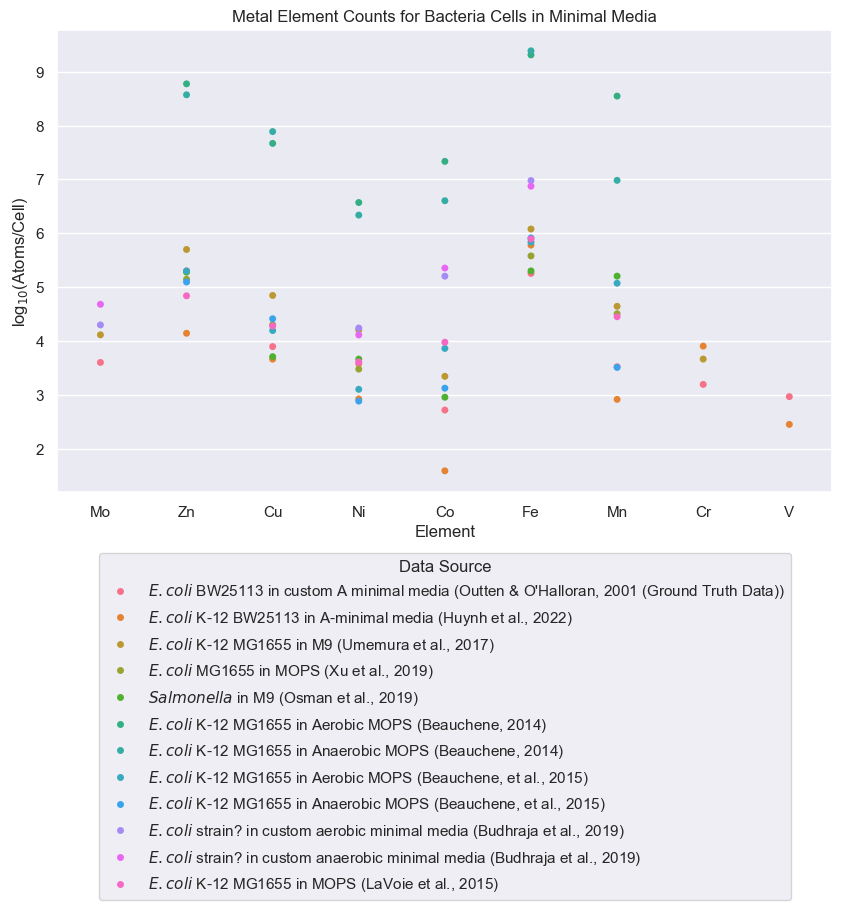

In [15]:
# Create the vertical strip plot
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df_mm_long_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", jitter=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.9))
plt.title("Metal Element Counts for Bacteria Cells in Minimal Media")
plt.show()

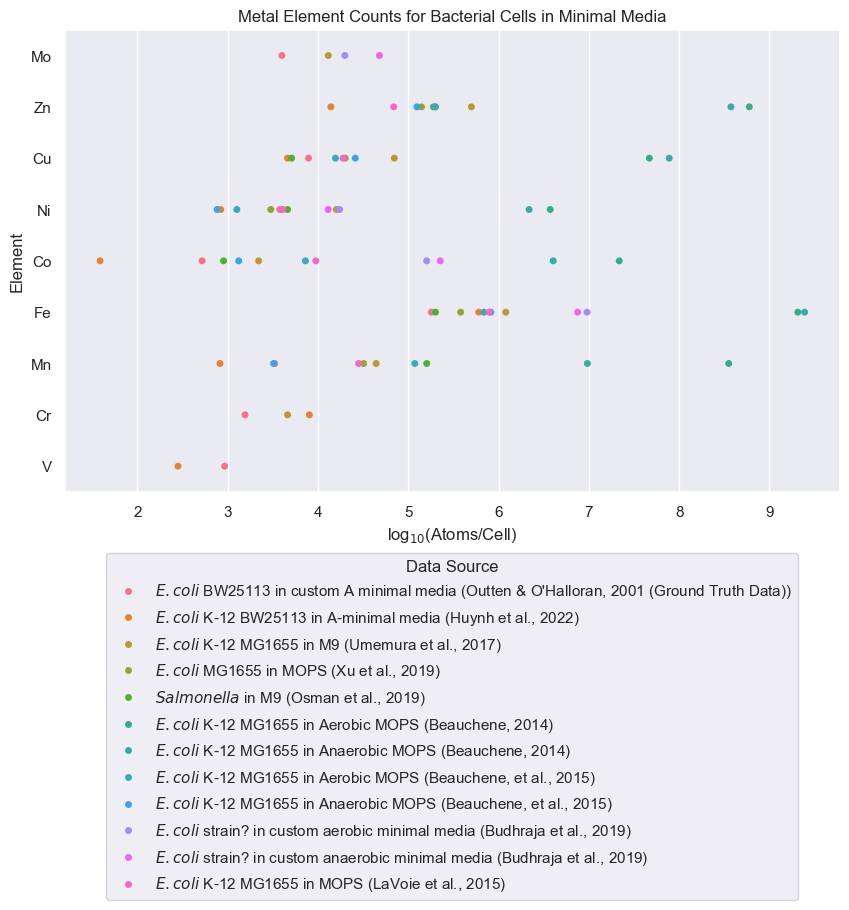

In [16]:
# create the horizontal stripplot:
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df_mm_long_pd, x="log$_{10}$(Atoms/Cell)", y="Element", hue="Data Source", jitter=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.9))
plt.title("Metal Element Counts for Bacterial Cells in Minimal Media")
plt.show()

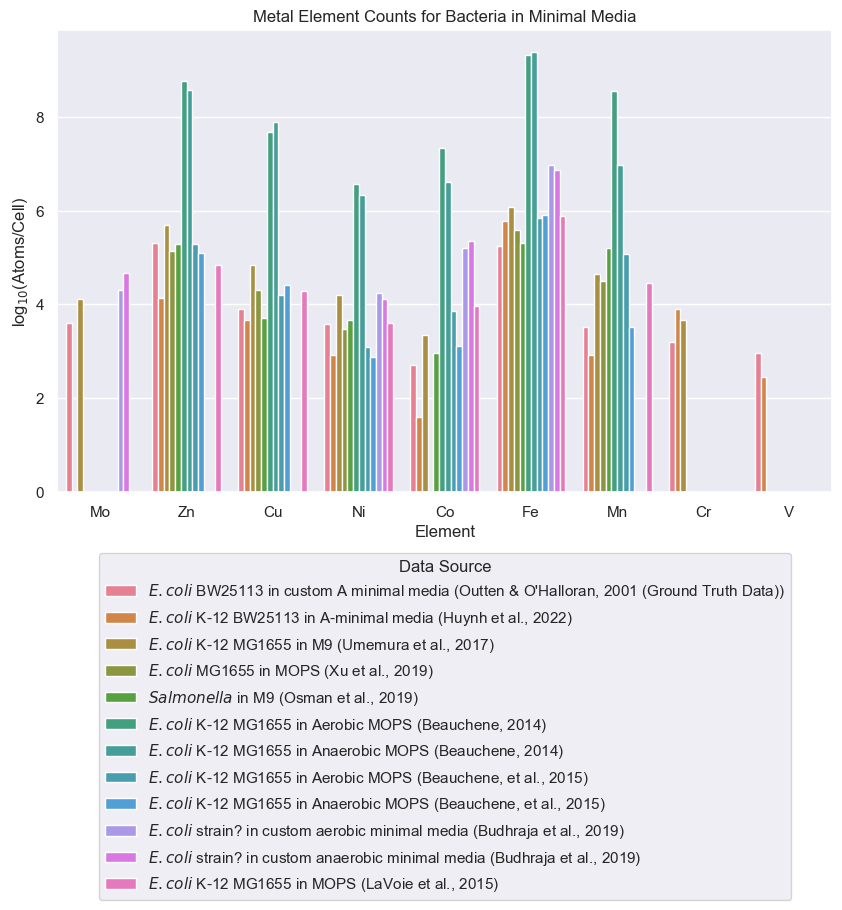

In [17]:
# create a bar plot of the metal counts data: 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_mm_long_pd, x="Element", y="log$_{10}$(Atoms/Cell)", hue="Data Source")
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.9))
plt.title("Metal Element Counts for Bacteria in Minimal Media")
plt.show()

# plot with the median 

In [18]:
# todo ask cyrus if he knows an easier way to do this in polars
# Transpose the DF for sorting
mm_exp_dataT = mm_exp_data.drop("Element")
mm_exp_dataT = mm_exp_dataT.transpose(include_header=True, header_name="Source", column_names=mm_exp_data.get_column("Element"))

# calculate the median for each column:
# could also probably use: lb_exp_dataT.select(pl.median("Mo"))
Mo_median = mm_exp_dataT.select("Mo").median()
Zn_median = mm_exp_dataT.select("Zn").median()
Cu_median = mm_exp_dataT.select("Cu").median()
Co_median = mm_exp_dataT.select("Co").median()
Ni_median = mm_exp_dataT.select("Ni").median()
Fe_median = mm_exp_dataT.select("Fe").median()
Mn_median = mm_exp_dataT.select("Mn").median()
Cr_median = mm_exp_dataT.select("Cr").median()
V_median = mm_exp_dataT.select("V").median()

medians_mm = [Mo_median.item(), Zn_median.item(), Cu_median.item(), Ni_median.item(), Co_median.item(), Fe_median.item(), Mn_median.item(), Cr_median.item(), V_median.item()]

# next, have to manually add this back to the original data frame, sort it, then drop the medians column

# create df with medians 
medians_mm_df = pl.DataFrame({
    "Element": ["Mo", "Zn", "Cu", "Ni", "Co", "Fe", "Mn", "Cr", "V"],
    "Median": medians_mm})

long_medians_mm = medians_mm_df.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")
long_medians_mm_pd = long_medians_mm.to_pandas()

# join the medians df with the original data frame! 
mm_exp_data_with_medians = mm_exp_data.join(medians_mm_df, on="Element", how="left", coalesce=True)

# sort by the median column
mm_exp_data_sorted_medians = mm_exp_data_with_medians.sort("Median", descending=True)

# drop the median column
mm_exp_data_sorted_medians = mm_exp_data_sorted_medians.drop("Median")

# reshape the data for graphs
df_long_medians_mm = mm_exp_data_sorted_medians.melt(id_vars=["Element"], variable_name="Data Source", value_name="log$_{10}$(Atoms/Cell)")
df_long_medians_mm_pd = df_long_medians_mm.to_pandas()

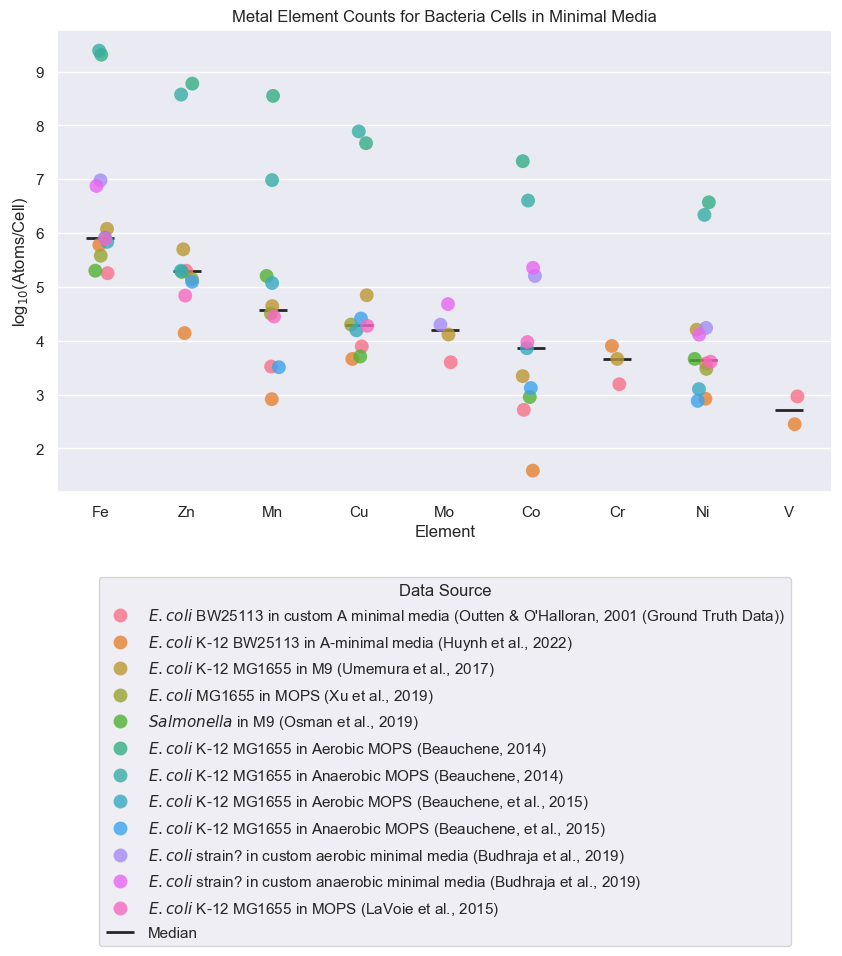

In [19]:
# Create the vertical strip plot
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df_long_medians_mm_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", jitter=True, size=10, alpha=.8)

# add a small marker at the median value of each element: 
ax = sns.pointplot(
     data=long_medians_mm_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", linestyle="none", errorbar=None,
     marker="_", markersize=20, markeredgewidth=2, palette='dark:black')

sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -1))
plt.title("Metal Element Counts for Bacteria Cells in Minimal Media")
plt.show()

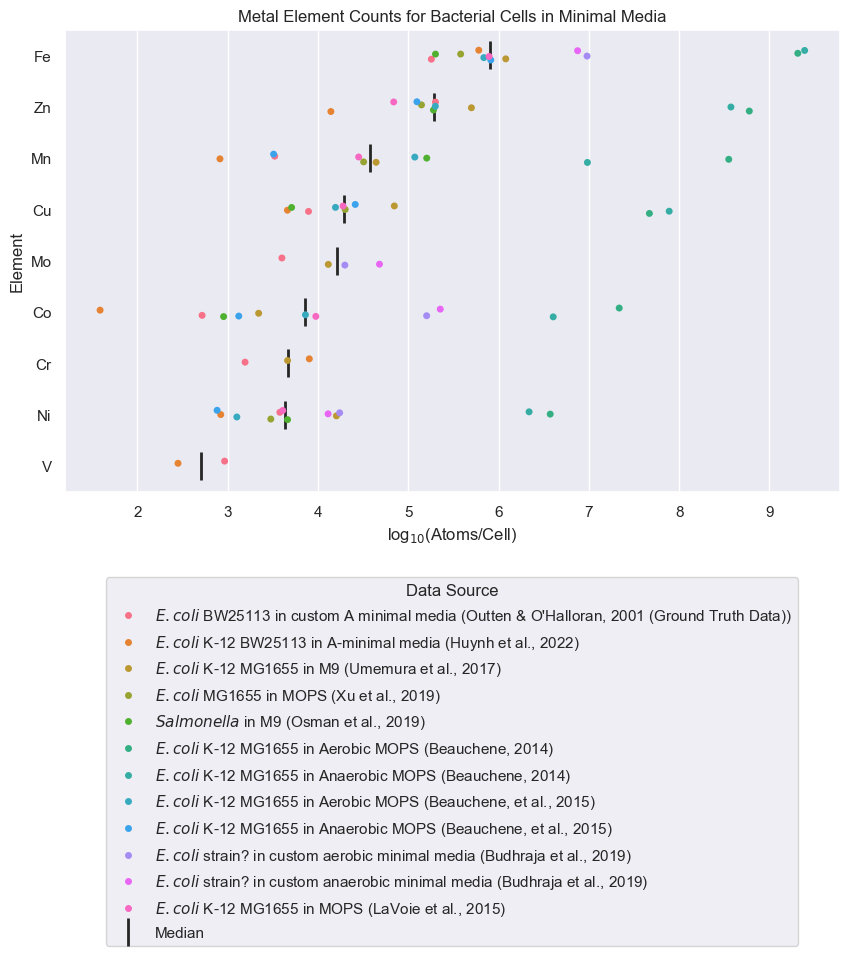

In [20]:
# create the horizontal stripplot:
plt.figure(figsize=(10, 6))
ax = sns.stripplot(data=df_long_medians_mm_pd, x="log$_{10}$(Atoms/Cell)", y="Element", hue="Data Source", jitter=True)

# add a small marker at the median value of each element: 
ax = sns.pointplot(data=long_medians_mm_pd, x="log$_{10}$(Atoms/Cell)", y="Element", hue="Data Source", linestyle="none", errorbar=None, marker="|", markersize=20, markeredgewidth=2, palette='dark:black')

sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -1))
plt.title("Metal Element Counts for Bacterial Cells in Minimal Media")
plt.show()

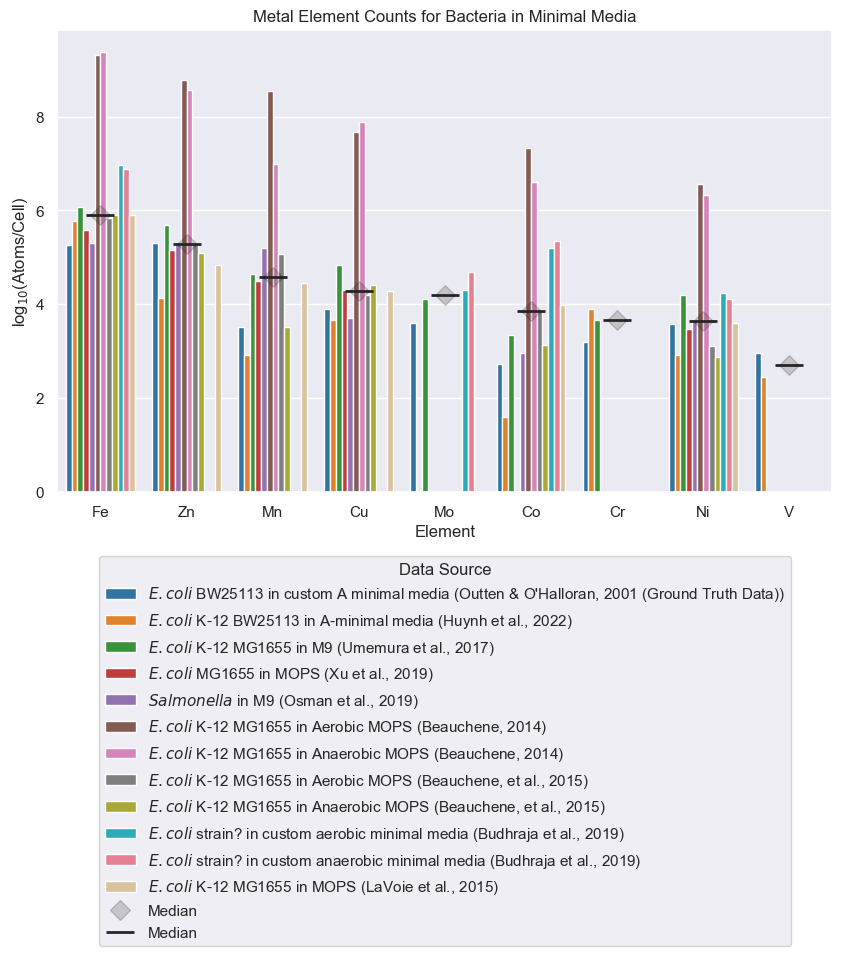

In [21]:
# create a bar plot of the metal counts data: 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_long_medians_mm_pd, x="Element", y="log$_{10}$(Atoms/Cell)", hue="Data Source", palette=custom_palette1)


# plot the median values for each element:
ax = sns.stripplot(data=long_medians_mm_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", jitter=False, s=10, marker="D", linewidth=1, alpha=.2, palette="dark:red")

# plot the median values for each element:
ax = sns.pointplot(
     data=long_medians_mm_pd, y="log$_{10}$(Atoms/Cell)", x="Element", hue="Data Source", linestyle="none", errorbar=None,
     marker="_", markersize=20, markeredgewidth=2, palette='dark:black')


sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -1))
plt.title("Metal Element Counts for Bacteria in Minimal Media")
plt.show()

## template

Media type:  media

Bacterial species:

Units used in calculations:

QUESTIONS/ISSUES:

# Hybrid media conditions?